In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

In [4]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

### Categorical plots

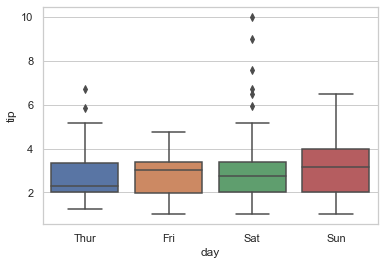

In [4]:
sns.boxplot(x="day",y="tip", data = tips)

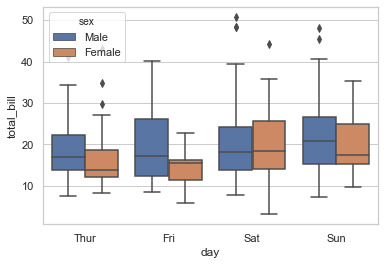

In [8]:
sns.boxplot(x="day",y="total_bill", hue="sex", data = tips)

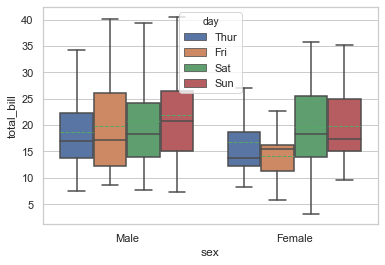

In [14]:
# Add extra parameters realted to matplotlib
sns.boxplot(x="sex",y="total_bill",hue="day", data = tips, showmeans=True, meanline=True, showfliers=False)

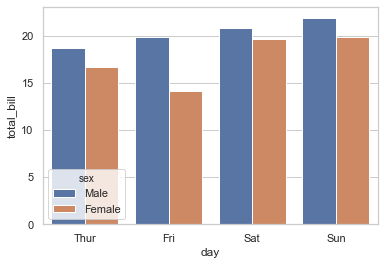

In [32]:
# Default estimator is mean 
sns.barplot(x="day",y="total_bill", hue="sex", data = tips, ci=False)

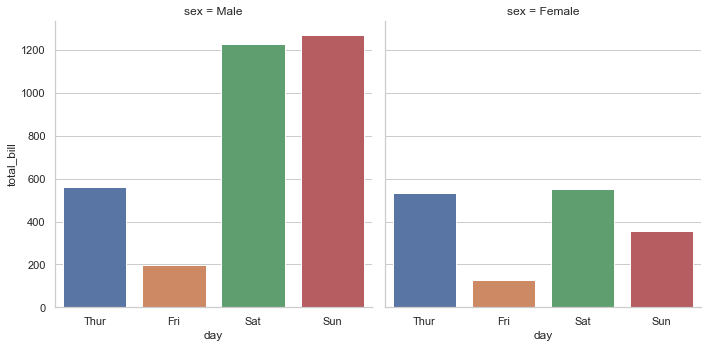

In [31]:
# Figure level API
sns.catplot(x="day",y="total_bill",data=tips,col="sex", kind='bar', ci=False, estimator=sum)

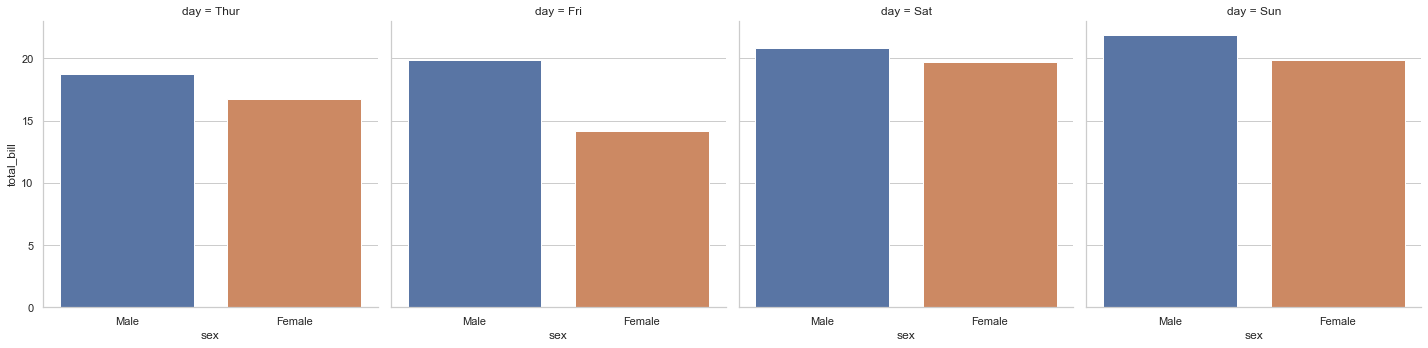

In [22]:
# Figure level API
sns.catplot(x="sex",y="total_bill",data=tips,col="day", kind='bar', ci=False)

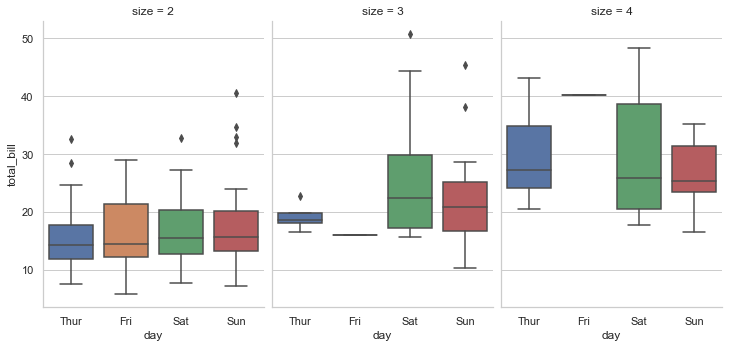

In [24]:
seltips = tips[tips['size'].isin([2,3,4])]
sns.catplot(x="day",y="total_bill",data=seltips,col="size", kind='box')
plt.gcf().set_size_inches(10,5)  # Change current figure size 

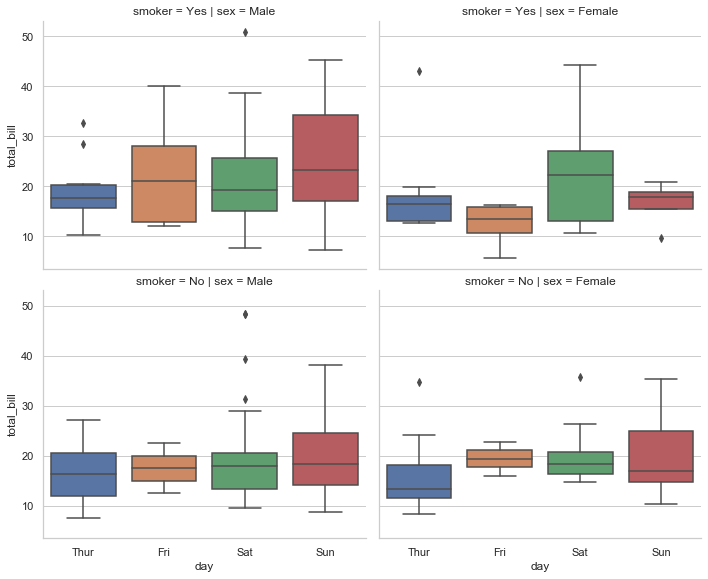

In [25]:
sns.catplot(x="day",y="total_bill",data=seltips,col="sex", row="smoker", kind='box')
plt.gcf().set_size_inches(10,8)  # Change current figure size 

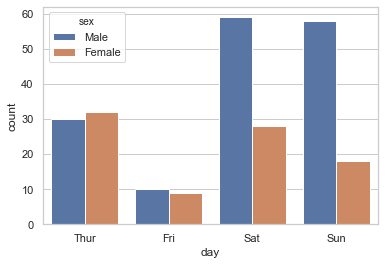

In [26]:
sns.countplot(x="day",hue ="sex", data=tips)

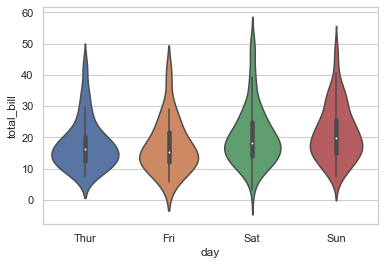

In [36]:
sns.violinplot(x="day",y="total_bill",data=tips)

In [27]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [28]:
flights.groupby('month')['passengers'].sum()

month
January      2901
February     2820
March        3242
April        3205
May          3262
June         3740
July         4216
August       4213
September    3629
October      3199
November     2794
December     3142
Name: passengers, dtype: int64

In [30]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


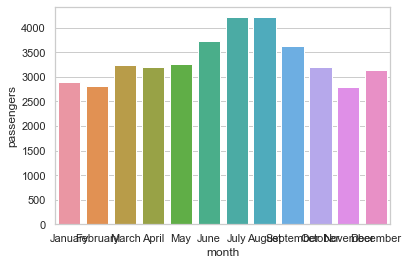

In [35]:
sns.barplot(x="month",y="passengers",data=flights,ci=False,estimator=np.sum)

### Relational plots

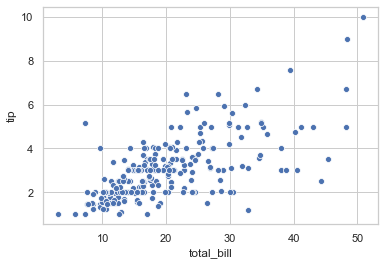

In [37]:
sns.scatterplot(x="total_bill",y="tip", data=tips)

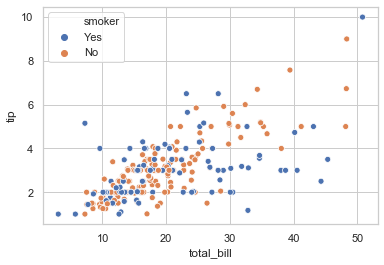

In [39]:
sns.scatterplot(x="total_bill",y="tip",hue="smoker", data=tips)

In [41]:
fs = flights.groupby('month',as_index=False)['passengers'].sum()
fs

,month,passengers
0,January,2901
1,February,2820
2,March,3242
3,April,3205
4,May,3262
5,June,3740
6,July,4216
7,August,4213
8,September,3629
9,October,3199


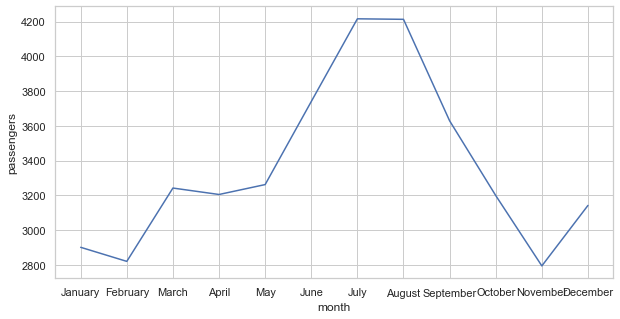

In [42]:
sns.lineplot(x=fs.month, y = fs.passengers)
plt.gcf().set_size_inches(10,5)

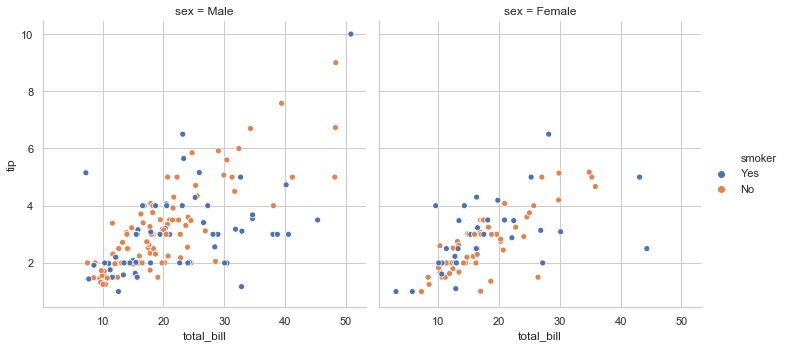

In [43]:
# Figure level 
sns.relplot(x="total_bill",y="tip",col="sex", hue="smoker",data=tips)

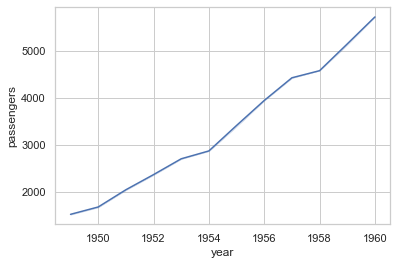

In [44]:
sns.lineplot(x="year",y="passengers",data=flights, estimator=np.sum, ci=False)

## Distribution plots

### pairplot

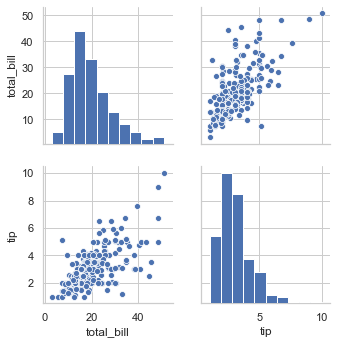

In [7]:
sns.pairplot(tips,vars=['total_bill','tip'],diag_kind='hist')
#plt.gcf().set_size_inches(8,8)

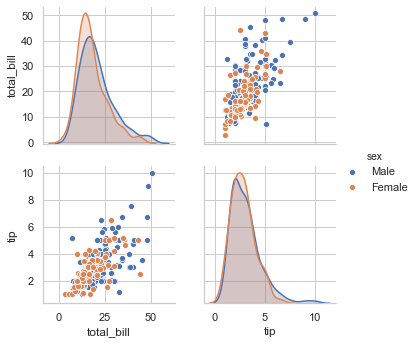

In [15]:
sns.pairplot(tips,vars=['total_bill','tip'], hue='sex', diag_kind='kde')

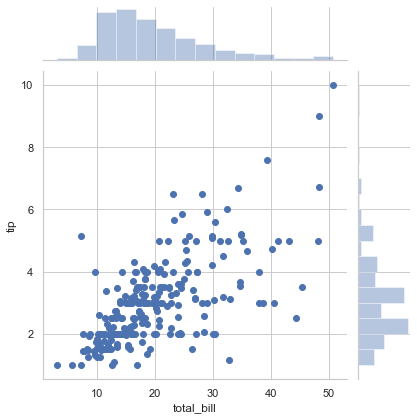

In [8]:
sns.jointplot(x='total_bill', y = 'tip', data = tips)

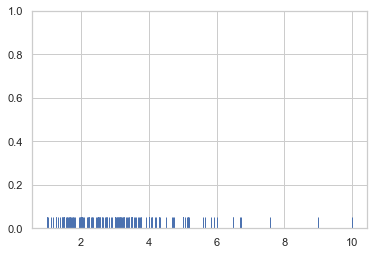

In [11]:
sns.rugplot(tips['tip'])

### Regression Plot

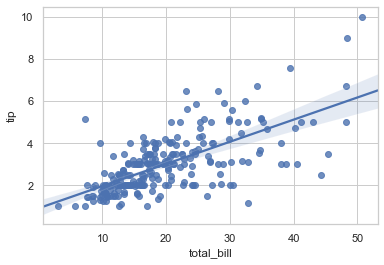

In [12]:
sns.regplot(x="total_bill",y='tip', data=tips)

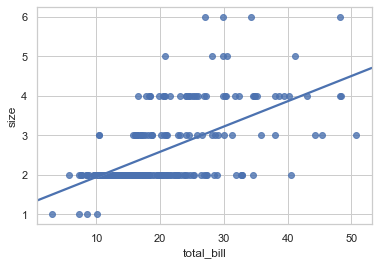

In [16]:
sns.regplot(x="total_bill",y='size', data=tips, ci=False)

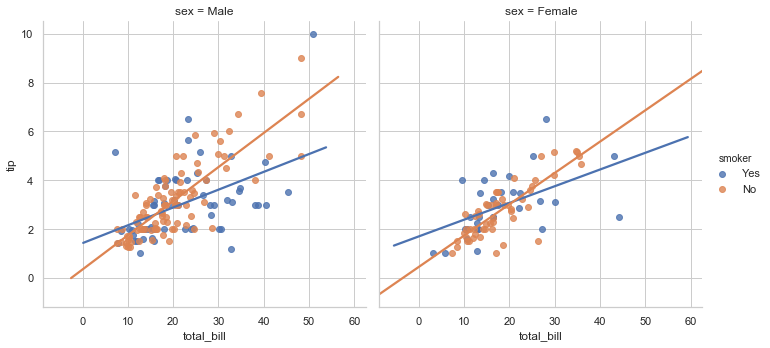

In [17]:
sns.lmplot(x="total_bill",y='tip',hue="smoker",col='sex', data=tips,ci=False)

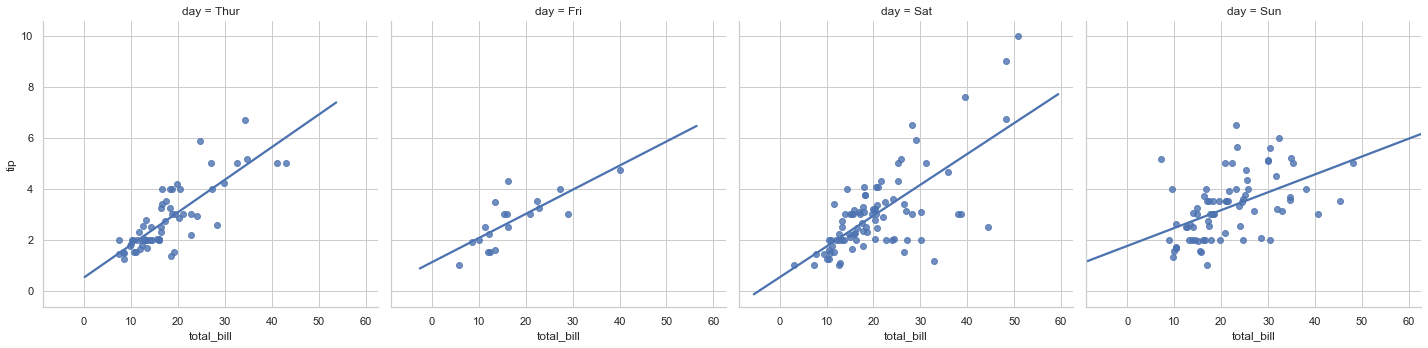

In [18]:
sns.lmplot(x="total_bill",y='tip',col='day', data=tips,ci=False)

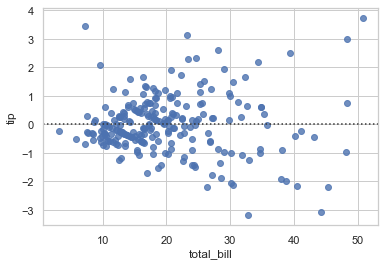

In [19]:
sns.residplot(x="total_bill",y='tip', data=tips)

### Matrix plots

In [24]:
day_tips = tips.groupby('day', as_index=False)['tip','total_bill'].sum()

In [25]:
day_tips

,day,tip,total_bill
0,Thur,171.83,1096.33
1,Fri,51.96,325.88
2,Sat,260.40,1778.40
3,Sun,247.39,1627.16


In [31]:
ds = tips.pivot_table (index = "day", columns = "time", values="total_bill", aggfunc=np.sum)

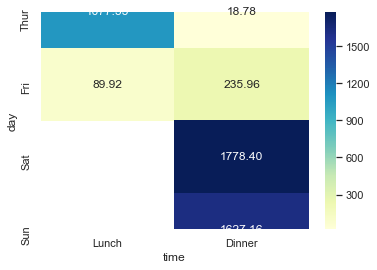

In [40]:
sns.heatmap(ds, annot=True,fmt=".2f", cmap='YlGnBu')

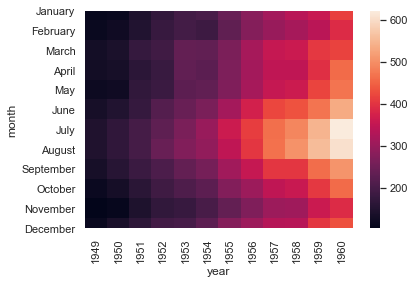

In [45]:
fl_summary = flights.pivot('month','year','passengers')
ax = sns.heatmap(fl_summary)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


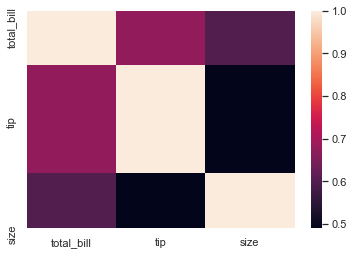

In [48]:
cm = tips.corr()
print(cm)
sns.heatmap(cm)

In [52]:
tips['sm_code'] = tips.smoker.apply(lambda v : 1 if v == 'Yes' else 0)
tips.sm_code = tips.sm_code.astype('int32')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sm_code       244 non-null int32
dtypes: category(4), float64(2), int32(1), int64(1)
memory usage: 8.2 KB


            total_bill       tip      size   sm_code
total_bill    1.000000  0.675734  0.598315  0.085721
tip           0.675734  1.000000  0.489299  0.005929
size          0.598315  0.489299  1.000000 -0.133178
sm_code       0.085721  0.005929 -0.133178  1.000000


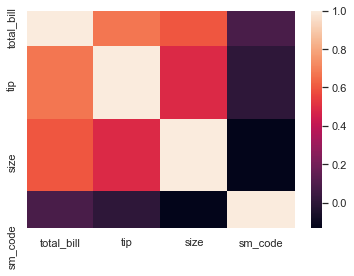

In [53]:
cm = tips.corr()
print(cm)
sns.heatmap(cm)